In [45]:
import cv2
import matplotlib.pyplot as plt

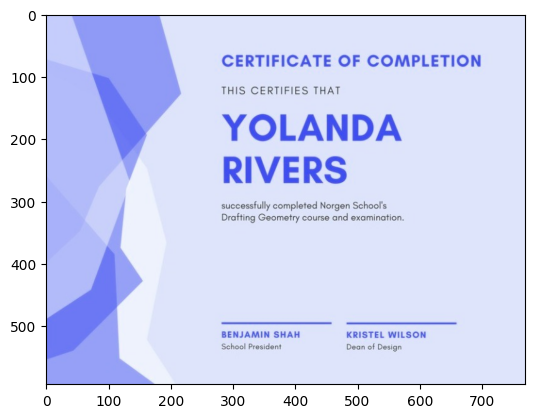

In [46]:
image = cv2.imread('test1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.imshow(image)

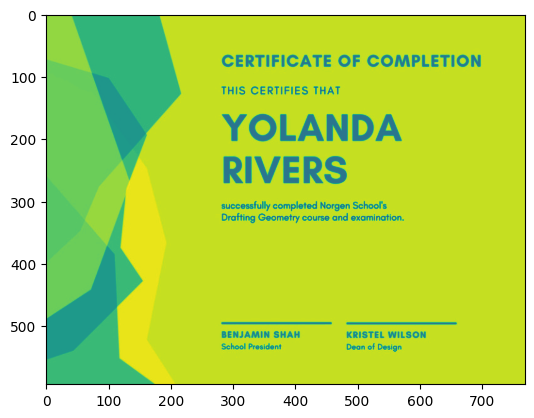

In [47]:
plt.imshow(gray)

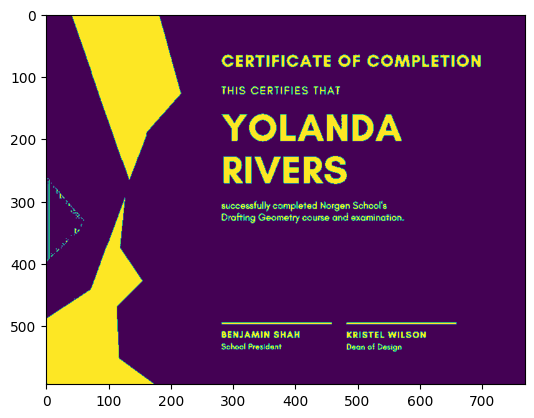

In [48]:
plt.imshow(thresh)

In [49]:
close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,3))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, close_kernel, iterations=1)

dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,3))
dilate = cv2.dilate(close, dilate_kernel, iterations=1)

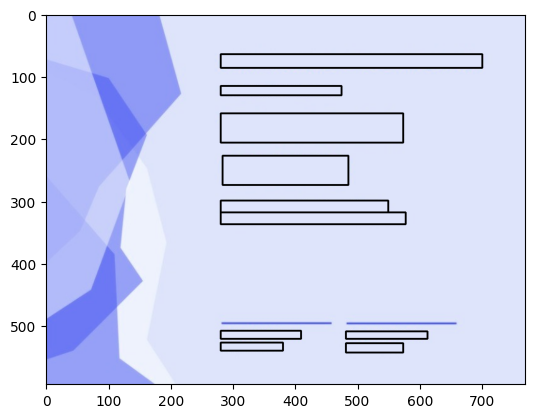

In [50]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area > 800 and area < 15000:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (222,228,251), -1)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,0), 2)

plt.imshow(image)

####################################################################################################################################

In [51]:
import cv2, numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [52]:
def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

In [53]:
def main_colors(cluster, centroids):
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)], reverse=True)
    per, first_color = colors[0]
    return first_color.astype("uint8").tolist()

c:\Users\PC\.conda\envs\olv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 55.50147139 113.87400545  75.57046322] 3.24%
[ 87.14500586 147.61954682 177.55235057] 5.41%
[162.95748024 222.52143726 241.59324954] 6.94%
[ 9.8178663  22.43810674 21.54288014] 7.02%
[19.94442308 47.61103846 71.38292308] 9.18%
[ 26.22635611  69.25827064 123.17537531] 10.28%
[116.80953704 189.69004622 230.27792792] 13.97%
[ 50.63317152 128.6258772  196.09402118] 14.03%
[ 40.85514575 103.65709895 158.46633948] 14.23%
[ 79.27123029 160.39869075 221.1771534 ] 15.72%
[79, 160, 221] <class 'list'>


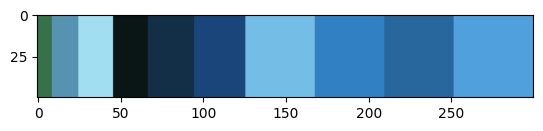

In [54]:
# Load image and convert to a list of pixels
image = cv2.imread('test2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
reshape = image.reshape((image.shape[0] * image.shape[1], 3))

# Find and display most dominant colors
cluster = KMeans(n_clusters=10).fit(reshape)
visualize = visualize_colors(cluster, cluster.cluster_centers_)
#visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)

domini_color = main_colors(cluster, cluster.cluster_centers_)
print(domini_color, type(domini_color))

cv2.imshow('img', visualize)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(visualize)

In [55]:
cluster.cluster_centers_

array([[ 79.27123029, 160.39869075, 221.1771534 ],
       [ 26.22635611,  69.25827064, 123.17537531],
       [116.80953704, 189.69004622, 230.27792792],
       [  9.8178663 ,  22.43810674,  21.54288014],
       [ 50.63317152, 128.6258772 , 196.09402118],
       [162.95748024, 222.52143726, 241.59324954],
       [ 19.94442308,  47.61103846,  71.38292308],
       [ 55.50147139, 113.87400545,  75.57046322],
       [ 87.14500586, 147.61954682, 177.55235057],
       [ 40.85514575, 103.65709895, 158.46633948]])